## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure7_cdf_dce_groups` from `5_cdf_dce_groups` 

created by Cassie Lumbrazo\
last updated: June 2025\
run location: UAS Linux\
python environment: **cer_treatment**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine


# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds = xr.open_dataset('/home/cassie/data/cer_treatment_manuscript/cer_treatment_region_dataset_all_variables.nc') # Cassie remote path on new linux machine

ds

<xarray.Dataset> Size: 5GB
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 21kB 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 11kB 2.111e+05 ... 2.097e+05
  * band                              (band) int32 4B 1
    spatial_ref                       int32 4B ...
Data variables: (12/337)
    chmws_rapid                       (band, y, x) float32 14MB ...
    dce_rapid                         (band, y, x) float32 14MB ...
    giulia_dce_rapid                  (band, y, x) float32 14MB ...
    giulia_dce_ncalm                  (band, y, x) float32 14MB ...
    slope                             (band, y, x) float32 14MB ...
    aspect                            (band, y, x) float32 14MB ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 14MB ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 14MB ...

## Constants and Calculations to Run before any other sections

In [4]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [6]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [7]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [11]:
dce_reclass = ds['dce_rapid'].copy(deep=True) # where cond = False, replace (unless we use the ~)  

# previously was 3m with Giulia, tried 5m, and now trying 7m, 8m, then 10m    
num_max = 8            
num_mid = 2            

dce_reclass = dce_reclass.where(~(( num_max <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps     5 <  DCE <=  20
dce_reclass = dce_reclass.where(~(( num_mid <  dce_reclass) & (dce_reclass <=  num_max)), 400) # group 2: Small Gaps      1 <  DCE <=  5
dce_reclass = dce_reclass.where(~((-num_mid <= dce_reclass) & (dce_reclass <=  num_mid)), 300) # group 5: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-num_max <= dce_reclass) & (dce_reclass <  -num_mid)), 200) # group 4: Small Clusters -5 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-num_max), 100)                           # group 5: Large Clusters       DCE <= -5

ds['dce_rapid_reclass_2'] = dce_reclass.copy(deep=True)

# first define the hs for each dce group
ds['hs_dce_rapid_reclass_2_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 100) # forest
ds['hs_dce_rapid_reclass_2_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 200)
ds['hs_dce_rapid_reclass_2_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 300)
ds['hs_dce_rapid_reclass_2_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 400)
ds['hs_dce_rapid_reclass_2_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass_2'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_2_100_n'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] == -1) #baf_ridge
ds['hs_dce_rapid_reclass_2_200_n'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_300_n'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_400_n'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_2_500_n'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_2_100_s'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_2_100_n_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] == -1) #dah_binary
ds['hs_dce_rapid_reclass_2_200_n_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_300_n_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_400_n_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_2_500_n_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_2_100_s_dah'] = ds['hs_dce_rapid_reclass_2_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_200_s_dah'] = ds['hs_dce_rapid_reclass_2_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_300_s_dah'] = ds['hs_dce_rapid_reclass_2_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_400_s_dah'] = ds['hs_dce_rapid_reclass_2_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_2_500_s_dah'] = ds['hs_dce_rapid_reclass_2_500'].where(ds['dah_binary'] ==  1)

In [9]:
ds['dce_ncalm'] = ds['dce_ncalm'] / 0.3048 # TEMPORARY FIXING THE UNIT
dce_reclass = ds['dce_ncalm'].copy(deep=True) # where cond = False, replace (unless we use the ~)  

# previously was 3m with Giulia, tried 5m, and now trying 7m, 8m, then 10m    
num_max = 8            
num_mid = 2            

dce_reclass = dce_reclass.where(~(( num_max <  dce_reclass) & (dce_reclass <=  60)), 500) # group 1: Large Gaps     5 <  DCE <=  20
dce_reclass = dce_reclass.where(~(( num_mid <  dce_reclass) & (dce_reclass <=  num_max)), 400) # group 2: Small Gaps      1 <  DCE <=  5
dce_reclass = dce_reclass.where(~((-num_mid <= dce_reclass) & (dce_reclass <=  num_mid)), 300) # group 5: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-num_max <= dce_reclass) & (dce_reclass <  -num_mid)), 200) # group 4: Small Clusters -5 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-num_max), 100)                           # group 5: Large Clusters       DCE <= -5

ds['dce_ncalm_reclass_2'] = dce_reclass.copy(deep=True)

# first define the hs for each dce group
ds['hs_dce_ncalm_reclass_2_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 100) # forest
ds['hs_dce_ncalm_reclass_2_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 200)
ds['hs_dce_ncalm_reclass_2_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 300)
ds['hs_dce_ncalm_reclass_2_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 400)
ds['hs_dce_ncalm_reclass_2_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass_2'] == 500) # large gaps

# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_ncalm_reclass_2_100_n'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['baf_ridge'] == -1) #baf_ridge
ds['hs_dce_ncalm_reclass_2_200_n'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_300_n'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_400_n'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_ncalm_reclass_2_500_n'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_ncalm_reclass_2_100_s'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_200_s'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_300_s'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_400_s'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_ncalm_reclass_2_500_s'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_ncalm_reclass_2_100_n_dah'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['dah_binary'] == -1) #dah_binary
ds['hs_dce_ncalm_reclass_2_200_n_dah'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_300_n_dah'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_400_n_dah'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_ncalm_reclass_2_500_n_dah'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_ncalm_reclass_2_100_s_dah'] = ds['hs_dce_ncalm_reclass_2_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_200_s_dah'] = ds['hs_dce_ncalm_reclass_2_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_300_s_dah'] = ds['hs_dce_ncalm_reclass_2_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_400_s_dah'] = ds['hs_dce_ncalm_reclass_2_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_ncalm_reclass_2_500_s_dah'] = ds['hs_dce_ncalm_reclass_2_500'].where(ds['dah_binary'] ==  1)

# Figure

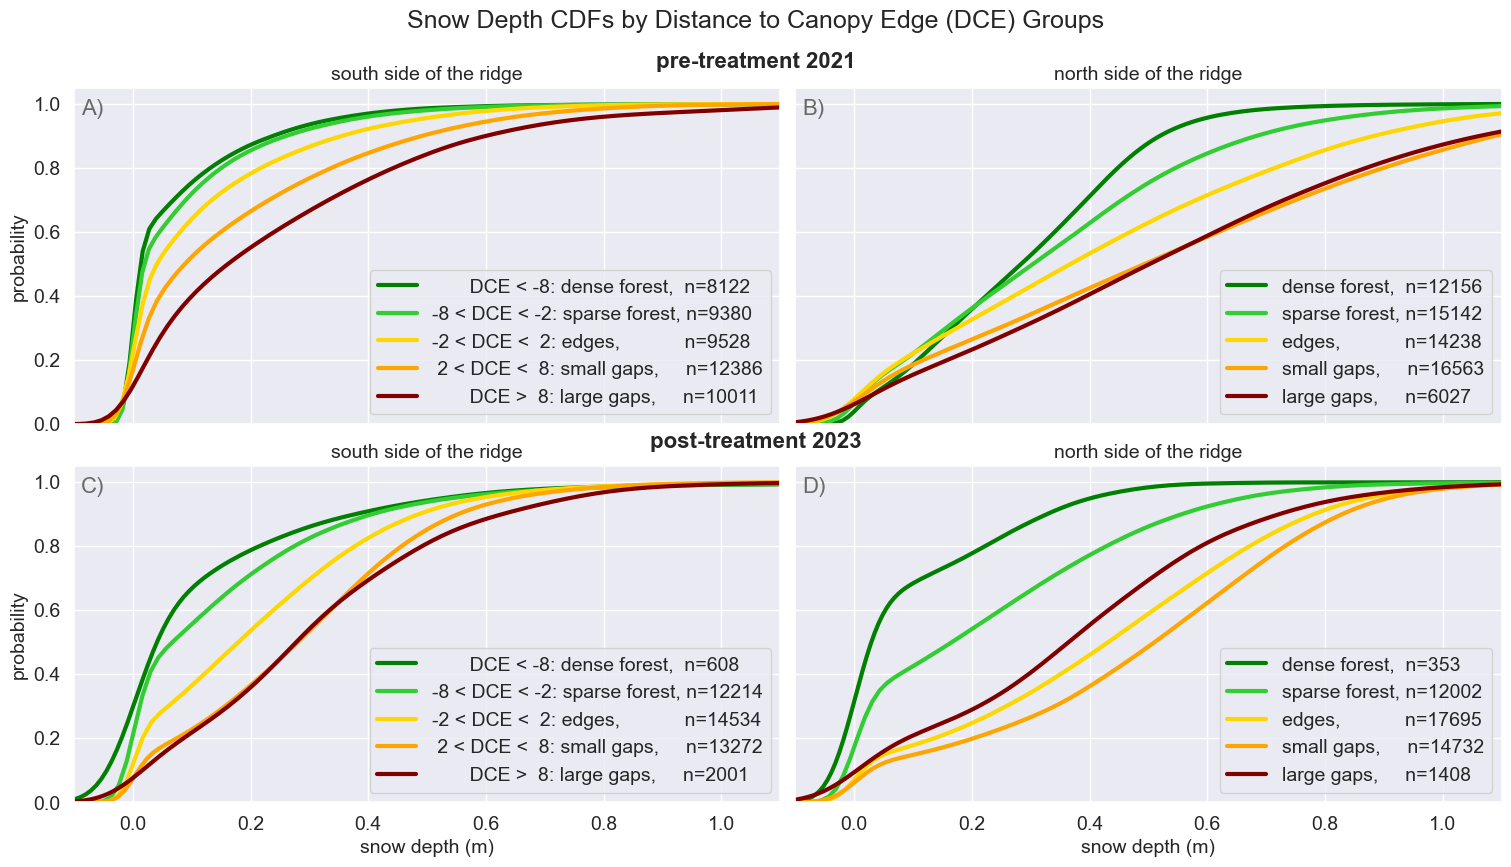

In [12]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_s'].values.flatten(), ax=axes[0,0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_s'].values.flatten(), ax=axes[0,0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_s'].values.flatten(), ax=axes[0,0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_s'].values.flatten(), ax=axes[0,0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_s'].values.flatten(), ax=axes[0,0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_ncalm_reclass_2_100_n'].values.flatten(), ax=axes[0,1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_ncalm_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_200_n'].values.flatten(), ax=axes[0,1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_ncalm_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_300_n'].values.flatten(), ax=axes[0,1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_ncalm_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_400_n'].values.flatten(), ax=axes[0,1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_ncalm_reclass_2_500_n'].values.flatten(), ax=axes[0,1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_ncalm_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_s'].values.flatten(), ax=axes[1,0], color='green',     label=f'       DCE < -8: dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_s'].values.flatten(), ax=axes[1,0], color='limegreen', label=f'-8 < DCE < -2: sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_s'].values.flatten(), ax=axes[1,0], color='gold',      label=f'-2 < DCE <  2: edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_s'].values.flatten(), ax=axes[1,0], color='orange',    label=f' 2 < DCE <  8: small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_s'].values.flatten(), ax=axes[1,0], color='maroon',    label=f'       DCE >  8: large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_2_100_n'].values.flatten(), ax=axes[1,1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_2_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_200_n'].values.flatten(), ax=axes[1,1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_2_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_300_n'].values.flatten(), ax=axes[1,1], color='gold',      label=f'edges,            n={np.unique(ds["hs_dce_rapid_reclass_2_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_400_n'].values.flatten(), ax=axes[1,1], color='orange',    label=f'small gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_2_500_n'].values.flatten(), ax=axes[1,1], color='maroon',    label=f'large gaps,     n={np.unique(ds["hs_dce_rapid_reclass_2_500_n"]).size}', cumulative=True, linewidth=3)


# labels
fontsize_num=14

# axes[0,0].set_title('south side of the ridge\npre-treatment 2021', fontsize=fontsize_num)
# axes[0,1].set_title('north side of the ridge\npre-treatment 2021', fontsize=fontsize_num)
# axes[1,0].set_title('south side of the ridge\npost-treatment 2023', fontsize=fontsize_num)
# axes[1,1].set_title('north side of the ridge\npost-treatment 2023', fontsize=fontsize_num)

# add text above the two columns which says north and south sides of the ridge in bold
# axes[0,0].text(0.5, 1.2, 'pre-treatment 2021', horizontalalignment='center', verticalalignment='center', transform=axes[0,0].transAxes, fontsize=fontsize_num, fontweight='bold')
# axes[0,1].text(0.5, 1.2, 'post-treatment 2023', horizontalalignment='center', verticalalignment='center', transform=axes[0,1].transAxes, fontsize=fontsize_num, fontweight='bold')

# fig.text(0.5, 0.950, 'pre-treatment 2021', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.5, 1.0, 'pre-treatment 2021', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.5, 0.525, 'post-treatment 2023', ha='center', va='center', fontsize=16, fontweight='bold')

axes[0,0].set_title('south side of the ridge', fontsize=fontsize_num)
axes[0,1].set_title('north side of the ridge', fontsize=fontsize_num)
axes[1,0].set_title('south side of the ridge', fontsize=fontsize_num)
axes[1,1].set_title('north side of the ridge', fontsize=fontsize_num)

axes[1,0].set_xlabel('snow depth (m)', fontsize=fontsize_num)
axes[1,1].set_xlabel('snow depth (m)', fontsize=fontsize_num)

axes[0,0].set_ylabel('probability', fontsize=fontsize_num)
axes[1,0].set_ylabel('probability', fontsize=fontsize_num)

axes[0,0].set_xlim(-0.1,1.1)

# plt.suptitle('Snow Depth CDFs by Distance to Canopy Edge (DCE) Groups', fontsize=18)
fig.text(0.5, 1.05, 'Snow Depth CDFs by Distance to Canopy Edge (DCE) Groups', ha='center', va='center',fontsize=18)

axes[0,0].legend(loc='lower right', fontsize=fontsize_num)
axes[0,1].legend(loc='lower right', fontsize=fontsize_num)
axes[1,0].legend(loc='lower right', fontsize=fontsize_num)
axes[1,1].legend(loc='lower right', fontsize=fontsize_num)

# increase the size of the tic marks
axes[0,0].tick_params(axis='both', which='major', labelsize=14)
axes[0,1].tick_params(axis='both', which='major', labelsize=14)
axes[1,0].tick_params(axis='both', which='major', labelsize=14)
axes[1,1].tick_params(axis='both', which='major', labelsize=14)

# add A) B) C) D) to the subplots 
axes[0,0].text(0.01, 0.92, 'A)', fontsize=16, color='dimgray', transform=axes[0,0].transAxes)
axes[0,1].text(0.01, 0.92, 'B)', fontsize=16, color='dimgray', transform=axes[0,1].transAxes)
axes[1,0].text(0.01, 0.92, 'C)', fontsize=16, color='dimgray', transform=axes[1,0].transAxes)
axes[1,1].text(0.01, 0.92, 'D)', fontsize=16, color='dimgray', transform=axes[1,1].transAxes)

# export the figure with high resolution
figure_name = 'figure7_cdf_dce_groups.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()